<a href="https://colab.research.google.com/github/Sazid669/DND-Practice/blob/IFRoS-Master/DND_2025_01_14_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Exam for Deep Network Development course. First part (mandatory)**

This notebook contains the task to be solved in order to pass the exam.
This is the first part of the exam, which is compolsury in order to get a grade. It contains a task similar to what you have worked on during the semester, which consists on implementing a network architecture and a function.

Please note that, to **PASS** the Deep Network Development course you must **SUBMIT A SUCCESSFUL SOLUTION FOR THE FIRST PART**. If you **FAIL** the first part, you have the right to do the exam **ONE MORE TIME**. If you **FAIL AGAIN**, then unfortunately, you have failed the course. If you **PASS** the first part, then you get the weighted average of your quizzes and assignments as your final grade.

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 14/01/2025 9AM-11AM

## Task Description

#### Your task is to implement a custom architecture inspired by a image-to-image Diffusion like model, and the forward function. The model receives an intial image and a text as input (describes how the final image should look like) and generates an image according to the two.

#### Afterwards, make sure to run cell code number 1.2. to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device

## 1. Architecture

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model / architecture. You will not find it on the internet.

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/1VWSuYR0Msa6M8FWnMJug3nZnPUytz3dS/view?usp=sharing

<br>
<br>

![](https://drive.google.com/uc?export=view&id=1VWSuYR0Msa6M8FWnMJug3nZnPUytz3dS)


#### Input image: Doge meme
By Atsuko Sato - https://kabosu112.exblog.jp/iv/detail/?s=9944144&i=201002%2F12%2F90%2Fa0126590_22301391.jpg, Fair use, https://en.wikipedia.org/w/index.php?curid=41704519

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

response = requests.get("https://upload.wikimedia.org/wikipedia/en/5/5f/Original_Doge_meme.jpg")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((256, 256))
image = np.rollaxis(np.array(image), 2, 0)

In [ ]:
image.shape

(3, 256, 256)

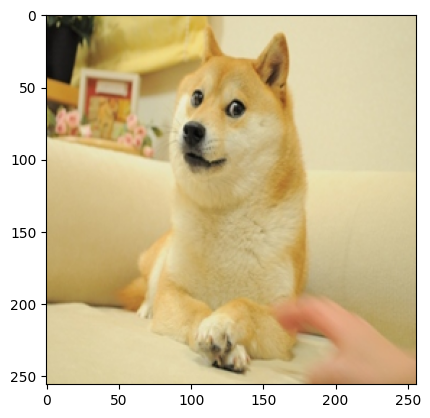

In [ ]:
plt.imshow(np.moveaxis(image, 0,-1))

In [ ]:
#Simple pre-processing
input_image = torch.tensor(image,dtype=torch.float32)
input_image = torch.unsqueeze(input_image, dim=0)
input_image.size()

torch.Size([1, 3, 256, 256])

#### Input text

In [ ]:
text = "A dog wearing sunglasses and suit"

# Simple preprocessing the text
word_to_ix = {"A": 0, "dog": 1, "wearing": 2, "sunglasses": 3, "and": 4, "suit": 5}
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long) # a tensor representing words by integers

vocab_size = len(lookup_tensor)

In [ ]:
vocab_size

6

#### 1.1. Implement the architecture

In [ ]:
class TextEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, out_channels):
        super(TextEncoder, self).__init__()
        # DEFINE the layers


    def forward(self, input_text):
        x=input_text
        # EMBED the input text

        # RESHAPE the embeddings and SEND them to the next layer

        return x


class ImageEncoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ImageEncoder, self).__init__()
        # DEFINE the layers


    def forward(self, input_image):
        # SEND the input image and then the features to the given layers
        x=input_image

        return x


class ImageDecoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ImageDecoder, self).__init__()
        # DEFINE the layers


    def forward(self, image_features):
       # SEND the input image and then the features to the given layers
        x=image_features
        return x


class Attention(nn.Module):
    def __init__(self, encoder_dim, bottleneck_dim, attention_dim):
        super(Attention, self).__init__()
        # DEFINE the layers


    def forward(self, text_encoder_outputs, image_encoder_features):

        # Send to the encoder_outputs to its linear layer
        context=image_encoder_features

        # Send to the bottleneck_features to its linear layer


        # Add together the previous two linear layers output and send it to the next layer

        # do softmax on the output

        # reshape the output and multiply the encoder_outputs with it.

        # sum by dim=1 the output

        # return the context output
        return  context


class MyUNet(nn.Module):
    def __init__(self, text_in_channels, bottleneck_channels, out_channels, attention_dim):
        super(MyUNet, self).__init__()
         # DEFINE the layers

    def forward(self, text_features, image_features):

        # SEND the text_features to the first conv2d layer (this output is needed to combination)

        x=image_features
        # SEND to the pooling layer

        # SEND to the secound conv layer (this output is also needed to a combination)


        # Send to the attention layer with the image_features


        # Send to the third convolutional layer


        # COMBINE the output of the secound conv layer and the output of the third layer (dim=1)


        # Send to the transposedconv2d layer


        # COMBINE the output of the transposed2d layer and the first conv layer output (dim=1)


        # SEND the COMBINED features to the last Conv2d and ReLU layer of the U-Net

        return x


class ImageToImageGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels, attention_dim): # 6, 1024, 3, 32, 64, 64, 64
        super(ImageToImageGenerator, self).__init__()
        # DEFINE the layers


    def forward(self, input_text, input_image):
        generated_image=input_text
        # SEND the input text to the TEXT ENCODER

        # SEND the input image to the IMAGE ENCODER

        # SEND the text_features and image_features to the U-NET

        # SEND the IMAGE FETURES from the U-NET to the IMAGE DECODER

        #return the image
        return generated_image

#### 1.2. Test your implementation
Expected output

torch.Size( [1, 3, 256, 256] )

In [ ]:
#DONT MODIFY THIS BLOCK
########################################################
# vocab_size = vocab_size
embedding_dim = 1024
image_channels = 3
text_encoder_out_channels = 32
image_encoder_out_channels = 64
unet_out_channels = 64
attention_dim= 64
model = ImageToImageGenerator(vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels,attention_dim)

input_text = lookup_tensor

# Forward pass
output = model(input_text, input_image)
print('----------------------------------------------------------------')
print("Output Image Shape:", output.shape)

For fun -- check the generated image, it should look something like this: https://drive.google.com/file/d/1NW3FwNSUj6bCyJd1TFvJUspLdmxR94m5/view?usp=sharing

<br>
<br>

![](https://drive.google.com/uc?export=view&id=1NW3FwNSUj6bCyJd1TFvJUspLdmxR94m5)


**Optional part for +1 grade**

Implement the architecture bellow:
https://drive.google.com/file/d/1TuIYbSp25FPazJMUMoAEdf12SoW-wkEh/view?usp=sharing

![](https://drive.google.com/uc?export=view&id=1TuIYbSp25FPazJMUMoAEdf12SoW-wkEh)


In [ ]:
class TextEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, out_channels):
        super(TextEncoder, self).__init__()
        # DEFINE the layers


    def forward(self, input_text):
        x=input_text
        # EMBED the input text

        # RESHAPE the embeddings and SEND them to the next layer

        return x


class ImageEncoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ImageEncoder, self).__init__()
        # DEFINE the layers


    def forward(self, input_image): # [1,3,256,256]
        # SEND the input image and then the features to the given layers
        x=input_image
        return x


class ImageDecoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ImageDecoder, self).__init__()
        # DEFINE the layers


    def forward(self, image_features):
       # SEND the input image and then the features to the given layers
        x=image_features

        return x


class MyUNet(nn.Module):
    def __init__(self, text_in_channels, bottleneck_channels, out_channels, attention_dim):
        super(MyUNet, self).__init__()
         # DEFINE the layers


    def forward(self, text_features, image_features):
        # SEND the text_features to the first conv2d layer (this output is needed to combination)
        x=image_features
        # SEND to the pooling layer

        # SEND to the secound conv layer (this output is also needed to a combination)

        # Send to the Cross-Attention layer with the image_features

        # SEND to the third conv layer

        # COMBINE the output of the secound conv layer and the output of the third conv layer (dim=1)

        # Send to the transposedconv2d layer

        # COMBINE the output of the transposed2d layer and the first conv layer output (dim=1)


        # SEND the COMBINED features to the last Conv2d and ReLU layer of the U-Net

        return x


class ImageToImageGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels, attention_dim): # 6, 1024, 3, 32, 64, 64, 64
        super(ImageToImageGenerator, self).__init__()
        # DEFINE the layers


    def forward(self, input_text, input_image):
        generated_image=input_text
        # SEND the input text to the TEXT ENCODER

        # SEND the input image to the IMAGE ENCODER

        # SEND the text_features and image_features to the U-NET

        # SEND the IMAGE FETURES from the U-NET to the IMAGE DECODER

        #return the image
        return generated_image


class CrossAttention(nn.Module):
    def __init__(self, embed_dim=1024, input_size_image=4096,input_size_text=4096):
        super(CrossAttention, self).__init__()
        # DEFINE the layers


    def forward(self, text_embedding, image_embedding):
        out=image_embedding
        # Flatten spatial dimensions (height, width) into sequence length


        # Compute Q, K, V


        # Compute attention scores


        # Compute weighted sum of values


        # Send to the output transformation


        # Reshape output back to original spatial dimensions

        return out

#### 1.2. Test your implementation
Expected output

torch.Size( [1, 3, 256, 256] )

In [ ]:
#DONT MODIFY THIS BLOCK
########################################################
embedding_dim = 1024
image_channels = 3
text_encoder_out_channels = 32
image_encoder_out_channels = 64
unet_out_channels = 64
attention_dim= 1024
model = ImageToImageGenerator(vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels,attention_dim)

input_text = lookup_tensor
# input_image = input_image

# Forward pass
output = model(input_text, input_image)
print('----------------------------------------------------------------')
print("Output Image Shape:", output.shape)
#########################################################

In [ ]:

%matplotlib inline

rgb_array = output[0].permute(1, 2, 0).detach().numpy()
rgb_array = rgb_array.clip(0, 1)
plt.imshow(rgb_array)


# Extra Task for AI-lab: Pairing Images and Texts

In this task, the goal is to pairs 4 images with 4 texts using Hugging Face models and a Gradio interface. The system ensures no duplicate images or texts are inputted, generates embeddings for both (images and texts), and matches them based on semantic similarity, then printing the pairs.